<a href="https://colab.research.google.com/github/unihong/MS-AI-School/blob/main/20230720_02_sift_rotate_90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Distance: 184.05433654785156
Keypoint 1: (x=196, y=127)
Keypoint 2: (x=184, y=245)
Distance: 201.14173889160156
Keypoint 1: (x=145, y=397)
Keypoint 2: (x=283, y=301)
Distance: 210.39012145996094
Keypoint 1: (x=216, y=338)
Keypoint 2: (x=270, y=314)
Distance: 212.03773498535156
Keypoint 1: (x=129, y=409)
Keypoint 2: (x=270, y=314)
Distance: 218.94747924804688
Keypoint 1: (x=187, y=300)
Keypoint 2: (x=51, y=246)
Distance: 220.8393096923828
Keypoint 1: (x=165, y=395)
Keypoint 2: (x=302, y=294)
Distance: 222.2161102294922
Keypoint 1: (x=176, y=465)
Keypoint 2: (x=394, y=269)
Distance: 223.629150390625
Keypoint 1: (x=281, y=466)
Keypoint 2: (x=229, y=257)
Distance: 224.14950561523438
Keypoint 1: (x=165, y=360)
Keypoint 2: (x=300, y=282)
Distance: 226.09068298339844
Keypoint 1: (x=165, y=448)
Keypoint 2: (x=76, y=257)


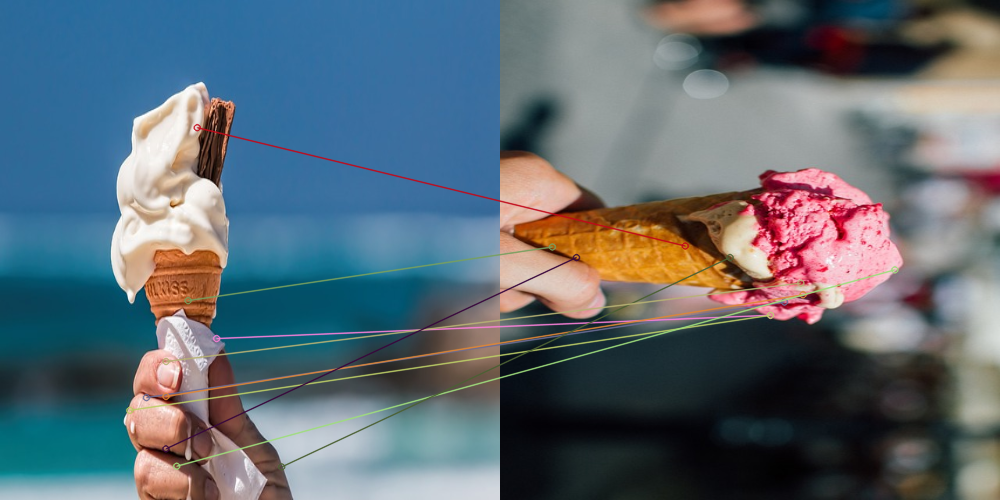

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# 이미지 로드
image1 = cv2.imread("./icecream.jpg")
image2 = cv2.imread("./icecream2.jpg")

image1 = cv2.resize(image1, (500, 500))
image2 = cv2.resize(image2, (500, 500))
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# 이미지2 -> 90회전
image2_rotated = cv2.rotate(image2, cv2.ROTATE_90_CLOCKWISE)
gray2_rotated = cv2.rotate(gray2, cv2.ROTATE_90_CLOCKWISE)

# SIFT 객체 생성
sift = cv2.SIFT_create()

# 키포인트 검출 및 특징 디스크립터 계산
keypoint1, descriptor1 = sift.detectAndCompute(gray1, None)
keypoint2, descriptor2 = sift.detectAndCompute(gray2_rotated, None)

# 키포인트 매칭
matcher = cv2.BFMatcher()
matches = matcher.match(descriptor1, descriptor2)

matches = sorted(matches, key=lambda x: x.distance)

for match in matches[:10]:
    print("Distance:", match.distance)
    print("Keypoint 1: (x=%d, y=%d)" % (int(keypoint1[match.queryIdx].pt[0]),
                                        int(keypoint1[match.queryIdx].pt[1])))
    print("Keypoint 2: (x=%d, y=%d)" % (int(keypoint2[match.trainIdx].pt[0]),
                                        int(keypoint2[match.trainIdx].pt[1])))

matched_image = cv2.drawMatches(image1, keypoint1, image2_rotated, keypoint2,
                                matches[:10], None,
                                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv2_imshow(matched_image)

